In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier, Lattice
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


In [20]:
### tight-binding parameters ###
delta = 1

# # checkerboard
# t0 = 0.4
# tprime = 0.5

# Haldane
t = 1
t2 = -0.4

### model ###
n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
# model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

model_str = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied:  1.0


In [21]:
random = False
low_E = False
omit = True

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
elif omit:
    omit_sites = 0
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
elif low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ

if random:
    save_name = model_str + f'_tfxs={tf_list}'
else:
    save_name = model_str + f'_tfx={np.array(tf_list, dtype=int)}'
    
print(f"Trial wavefunctions: {tf_list}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(save_name)

Trial wavefunctions: [np.int64(2), np.int64(4), np.int64(6)]
# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75
C=1.0_Delta=1_t=1_t2=-0.4_tfx=[2 4 6]


In [19]:
sv_dir = 'data'
sv_prefix = 'WF_max_loc'
file_name = f"{sv_dir}/{sv_prefix}_{save_name}.npy"
WF = np.load(f"{file_name}", allow_pickle=True).item()
WF.report()

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.23414
w_1 --> 0.23414
w_2 --> 0.23414
Centers:
w_0 --> [0.17941 0.6603 ]
w_1 --> [0.6603  0.17941]
w_2 --> [0.6603 0.6603]
Omega_i = 0.6577988768599141
Omega_tilde = 0.04460694512972264


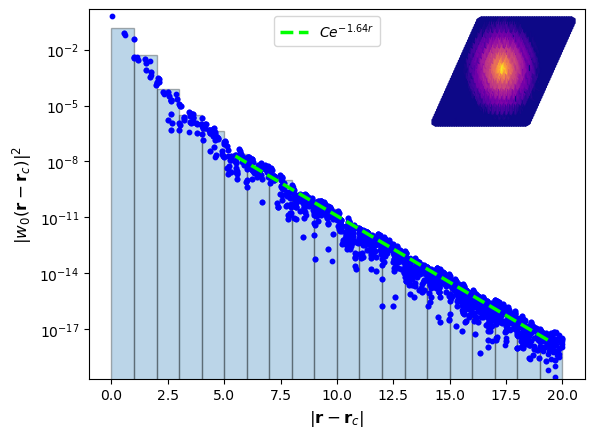

In [7]:
idx = 0
fig, ax = WF.plot_decay(idx, fit_rng=[5, 20], return_fig=True)
ax.legend(bbox_to_anchor=(0.6, 1.0))
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')  # You can adjust size and location
fig, inset_ax = WF.plot_density(idx, show_lattice=False, lat_size=2, cbar=False, fig=fig, ax=inset_ax, return_fig=True)
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.axis('off')
plt.savefig(f'images/decay_and_dens_{save_name}.png', dpi=700)

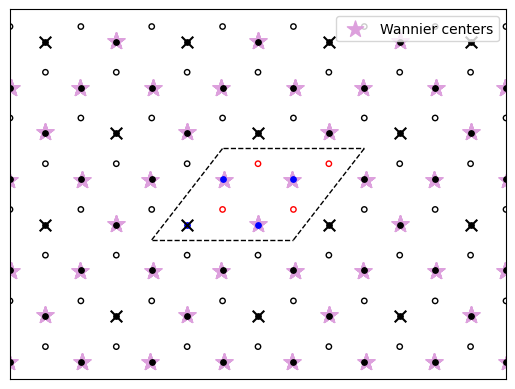

In [24]:
title = (
  "Haldane model \n"
  fr"$C = {chern: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
  )

kwargs_centers = {'s': 150, 'marker':'*', 'c':'plum', 'alpha':1} 
kwargs_omit = {'s': 70, 'marker':'x', 'c':'k', 'zorder':3} 
kwargs_lat = {'s': 15, 'marker':'o', 'c':'k'} 

fig, ax = WF.plot_centers(
    title=title, omit_sites=[omit_sites], section_home_cell=True, 
    color_home_cell=True, translate_centers=True, kwargs_centers=kwargs_centers, 
    kwargs_lat=kwargs_lat, kwargs_omit=kwargs_omit, pmx=3.5, pmy=3.5, legend=True)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('')

sv_dir = 'images'
sv_prefix = 'Wan_centers'
file_name = f"{sv_dir}/{sv_prefix}_{save_name}.png"

plt.savefig(file_name, dpi=700)